In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ujson as json        
import seaborn as sns


In [2]:
df = pd.read_json(r'C:\projects\internship_project\dataset.json', lines=True)



In [3]:
df.isnull().sum()

id                      0
submitter           15189
authors                 0
title                   0
comments           642556
journal-ref       1700868
doi               1361592
report-no         2378226
categories              0
license            452796
abstract                0
versions                0
update_date             0
authors_parsed          0
dtype: int64

In [4]:

interactions = []

# Function to log user interactions
def log_interaction(query, topic, satisfaction_rating):
    interaction = {
        'query': query,
        'topic': topic,
        'satisfaction_rating': satisfaction_rating
    }
    interactions.append(interaction)

# Example usage
log_interaction("What is machine learning?", "Machine Learning", 5)
log_interaction("Explain quantum computing.", "Quantum Computing", 4)

# Convert the interactions to a DataFrame for easier analysis
df_interactions = pd.DataFrame(interactions)

# Display the logged interactions
print(df_interactions)


                        query              topic  satisfaction_rating
0   What is machine learning?   Machine Learning                    5
1  Explain quantum computing.  Quantum Computing                    4


In [5]:
df['update_date'] = pd.to_datetime(df['update_date'])

Total Queries: 2560035

Most Common Topics:
title
Discussion of: A statistical analysis of multiple temperature proxies:\n  Are reconstructions of surface temperatures over the last 1000 years\n  reliable?    12
Beyond the Standard Model                                                                                                                                      11
Rare Kaon Decays                                                                                                                                                9
Neutrino Physics                                                                                                                                                9
Physics Beyond the Standard Model                                                                                                                               9
Discussion of "Least angle regression" by Efron et al                                                                                       

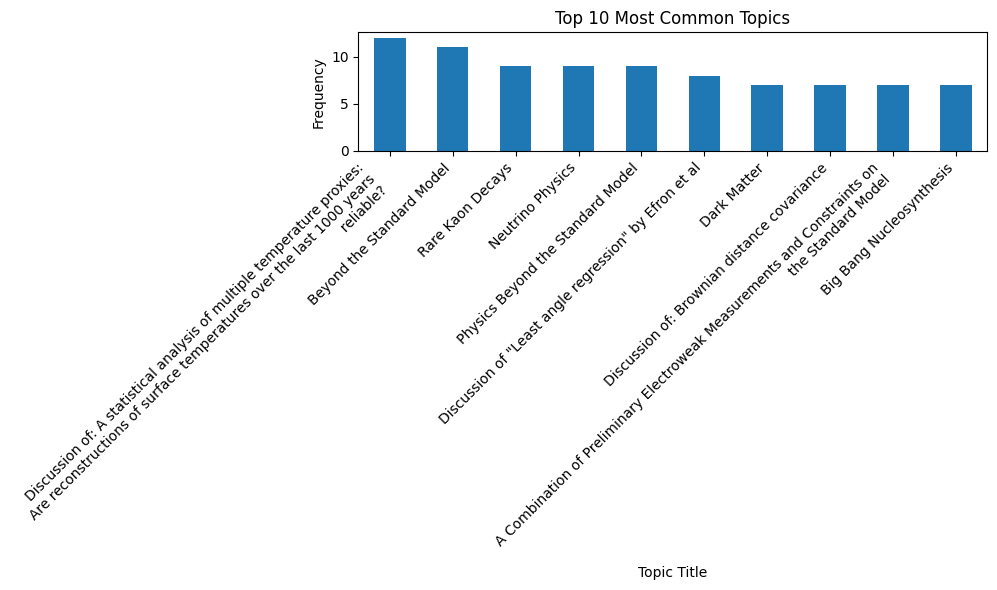

In [6]:
# Step 1: Count total number of queries
total_queries = len(df)
print(f"Total Queries: {total_queries}")

# Step 2: Find the most common topics (using the 'title' column)
most_common_topics = df['title'].value_counts().head(10)
print("\nMost Common Topics:")
print(most_common_topics)



plt.figure(figsize=(10, 6))
most_common_topics.plot(kind='bar')
plt.title('Top 10 Most Common Topics')
plt.xlabel('Topic Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

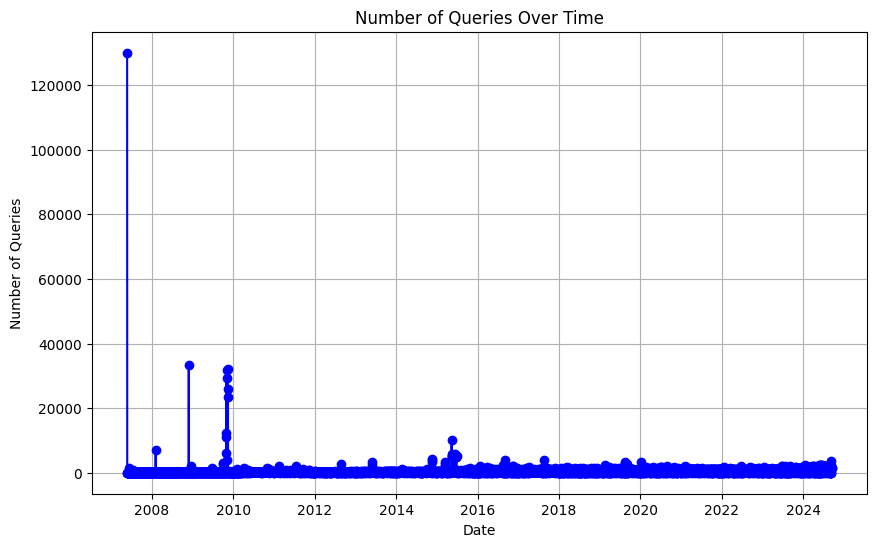

In [7]:
query_trends = df.groupby(df['update_date'].dt.date).size()

plt.figure(figsize=(10, 6))
query_trends.plot(kind='line', color='blue', marker='o')
plt.title('Number of Queries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Queries')
plt.grid(True)
plt.show()

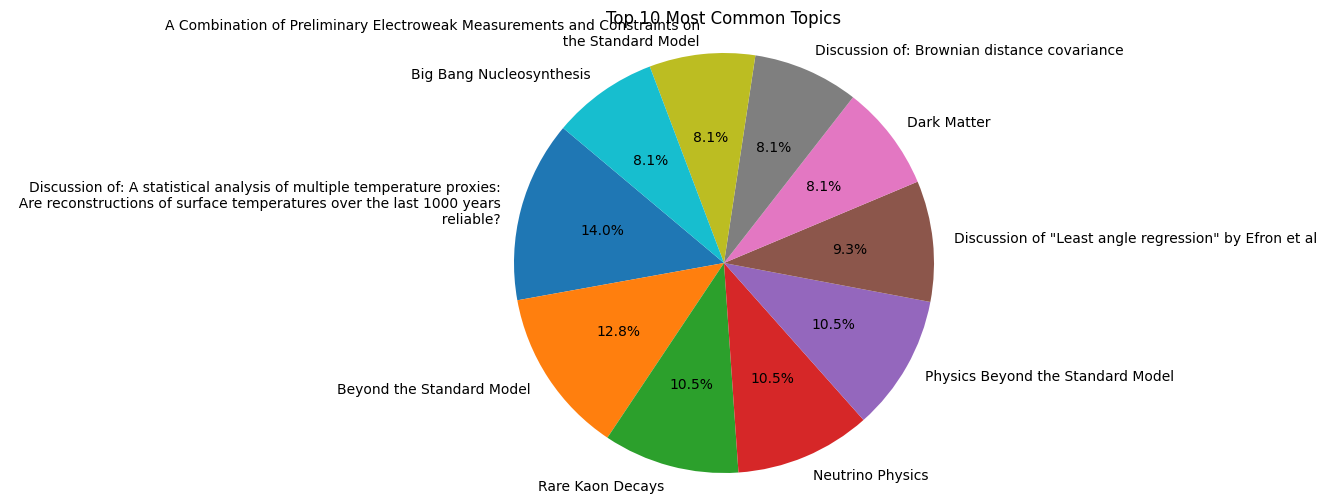

In [8]:
common_topics = df['title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.pie(common_topics.values, labels=common_topics.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Topics')
plt.axis('equal')  
plt.show()



In [9]:
df['satisfaction_rating'] = np.random.randint(1, 6, size=len(df))

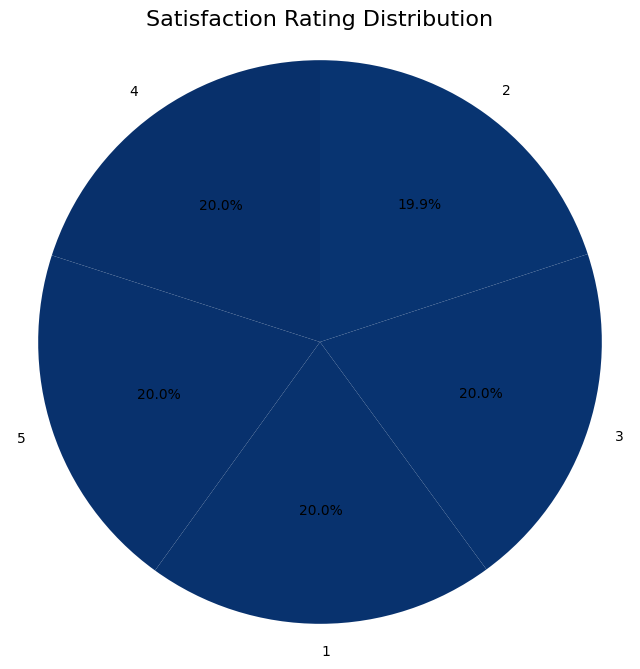

In [10]:
rating_counts = df['satisfaction_rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Blues_r(range(len(rating_counts))))
plt.title('Satisfaction Rating Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [11]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,satisfaction_rating
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",5
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",1
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",2
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",3
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",1


LETS CLEAN DATA FOR THE CHATBOT

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

id                      0.000000
submitter               0.593312
authors                 0.000000
title                   0.000000
comments               25.099501
journal-ref            66.439248
doi                    53.186460
report-no              92.898183
categories              0.000000
license                17.687102
abstract                0.000000
versions                0.000000
update_date             0.000000
authors_parsed          0.000000
satisfaction_rating     0.000000
dtype: float64

In [19]:
df.drop(columns=['journal-ref', 'report-no'])

,id,submitter,authors,title,comments,doi,categories,license,abstract,versions,update_date,authors_parsed,satisfaction_rating
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version",10.1103/PhysRevD.76.013009,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",5
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",1
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",2
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",3
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560030,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,"19 pages, LaTex, 6 PostScript figures; Author'...",10.1103/PhysRevB.54.15530,supr-con cond-mat.supr-con,None,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm...",1
2560031,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,"4 pages, LaTeX type, Uses IEEE style files, 60...",10.1109/77.620744,supr-con cond-mat.supr-con,None,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[[Choudhury, Durga P., , Physics Department, N...",5
2560032,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,"20 pages, LaTeX type, Uses REVTeX style files,...",10.1103/PhysRevB.56.11989,supr-con cond-mat.supr-con,None,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[[Willemsen, Balam A., , Physics Department,\n...",1
2560033,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,"7 pages, 4 PostScript Figures, LaTeX, to appea...",10.1143/JPSJ.65.3131,supr-con cond-mat.supr-con,None,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",2009-10-30,"[[Hasegawa, Yasumasa, , Himeji Institute of Te...",1


In [21]:
df.drop(columns=['doi','comments','license'])

,id,submitter,authors,title,journal-ref,report-no,categories,abstract,versions,update_date,authors_parsed,satisfaction_rating
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"Phys.Rev.D76:013009,2007",ANL-HEP-PR-07-12,hep-ph,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",5
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,None,None,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",1
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,None,None,physics.gen-ph,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",2
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,None,None,math.CO,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",3
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,"Illinois J. Math. 52 (2008) no.2, 681-689",None,math.CA math.FA,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
2560030,supr-con/9608008,Ruslan Prozorov,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",On the origin of the irreversibility line in t...,None,None,supr-con cond-mat.supr-con,We report on measurements of the angular dep...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 199...",2009-10-30,"[[Prozorov, R., ], [Konczykowski, M., ], [Schm...",1
2560031,supr-con/9609001,Durga P. Choudhury,"Durga P. Choudhury, Balam A. Willemsen, John S...",Nonlinear Response of HTSC Thin Film Microwave...,None,None,supr-con cond-mat.supr-con,The non-linear microwave surface impedance o...,"[{'version': 'v1', 'created': 'Sat, 31 Aug 199...",2016-11-18,"[[Choudhury, Durga P., , Physics Department, N...",5
2560032,supr-con/9609002,Durga P. Choudhury,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",Critical State Flux Penetration and Linear Mic...,None,None,supr-con cond-mat.supr-con,The vortex contribution to the dc field (H) ...,"[{'version': 'v1', 'created': 'Tue, 3 Sep 1996...",2009-10-30,"[[Willemsen, Balam A., , Physics Department,\n...",1
2560033,supr-con/9609003,Hasegawa Yasumasa,Yasumasa Hasegawa (Himeji Institute of Technol...,Density of States and NMR Relaxation Rate in A...,None,None,supr-con cond-mat.supr-con,We show that the density of states in an ani...,"[{'version': 'v1', 'created': 'Wed, 18 Sep 199...",2009-10-30,"[[Hasegawa, Yasumasa, , Himeji Institute of Te...",1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560035 entries, 0 to 2560034
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   object        
 1   submitter            object        
 2   authors              object        
 3   title                object        
 4   comments             object        
 5   journal-ref          object        
 6   doi                  object        
 7   report-no            object        
 8   categories           object        
 9   license              object        
 10  abstract             object        
 11  versions             object        
 12  update_date          datetime64[ns]
 13  authors_parsed       object        
 14  satisfaction_rating  int32         
dtypes: datetime64[ns](1), int32(1), object(13)
memory usage: 283.2+ MB


In [23]:
df.isnull().sum()

id                           0
submitter                15189
authors                      0
title                        0
comments                642556
journal-ref            1700868
doi                    1361592
report-no              2378226
categories                   0
license                 452796
abstract                     0
versions                     0
update_date                  0
authors_parsed               0
satisfaction_rating          0
dtype: int64

In [24]:

print(f"Total Queries: {total_queries}")

# Step 2: Find the most common topics (using the 'title' column)
most_common_topics = df['categories'].value_counts().head(10)
print("\nMost Common subsets:")
print(most_common_topics)

Total Queries: 2560035

Most Common subsets:
categories
astro-ph             86911
hep-ph               81782
quant-ph             70501
cs.CV                61984
hep-th               59265
cond-mat.mtrl-sci    40053
cond-mat.mes-hall    35338
math.AP              35013
astro-ph.GA          31373
gr-qc                30934
Name: count, dtype: int64


So the data i am choosing for my chatbot will be astro-ph as it is the more occured one and has the most data on.

In [25]:
chat_df = df[df['categories'].str.contains('astro-ph')]

In [29]:
total_chat_queries = len(chat_df)
print(f"Total chat_df Queries: {total_chat_queries}")
chat_df.isnull().sum()

Total chat_df Queries: 347808


id                          0
submitter                1777
authors                     0
title                       0
comments                16693
journal-ref            216641
doi                     72898
report-no              325556
categories                  0
license                 94559
abstract                    0
versions                    0
update_date                 0
authors_parsed              0
satisfaction_rating         0
dtype: int64

In [38]:
chat_df = chat_df.drop(columns=['submitter',  'doi', 'comments'])


In [40]:
chat_df = chat_df.drop(columns=['versions', 'authors_parsed'])

In [42]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347808 entries, 8 to 2559173
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   347808 non-null  object        
 1   authors              347808 non-null  object        
 2   title                347808 non-null  object        
 3   categories           347808 non-null  object        
 4   abstract             347808 non-null  object        
 5   update_date          347808 non-null  datetime64[ns]
 6   satisfaction_rating  347808 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 19.9+ MB


In [43]:
chat_df.to_csv(r'C:\projects\internship_project\chatbot_data.csv', index=False)


Now i have made the specific field dataset for the chatbot and saved to a csv file
